# Optimization

In [22]:
import nglview as nv
import psi4
import numpy as np
import qcelemental as qc

psi4.core.be_quiet()

In [23]:
Water = psi4.geometry ("pubchem:water")

	Searching PubChem database for water (single best match returned)
	Found 1 result(s)


In [24]:
type (water)

NameError: name 'water' is not defined

In [25]:
water.geometry().np

NameError: name 'water' is not defined

In [26]:
def molshow(psi4geo):
    """
    Generates a visualization for psi4.core.Molecule
    """
    geo_view = nv.Psi4Structure(water)
    geo_plot = nv.NGLWidget(geo_view)
    
    return(geo_plot)

In [18]:
molshow(water)

NGLWidget()

In [7]:
#Lets do an Optimization.

formal_str = """
noreorient
H 0.0 0.92 1.17
H 0.0 -0.92 1.17
O 0.0 0.0 0.60
O 0.0 0.0 -0.60
symmetry c1
"""
formal_psi4 = psi4.geometry (formal_str)
e = psi4.energy("HF/6-31G*", mol=formal_psi4)
print(f"Non Optimized Geometry {e}")

Non Optimized Geometry -150.59781375677204


In [8]:
#Write output file in optimization.dat
psi4.core.set_output_file("data/optimization.dat")

In [9]:
e_opt, history = psi4.optimize ('HF/6-31G*' , molecule = formal_psi4, return_history = True) 

Optimizer: Optimization complete!


In [10]:
formal_psi4.geometry().np

array([[ 0.00000000e+00,  1.51303326e+00,  2.34999851e+00],
       [ 0.00000000e+00, -1.51303326e+00,  2.34999851e+00],
       [ 0.00000000e+00, -1.38113507e-11,  1.39711888e+00],
       [ 0.00000000e+00, -3.71486127e-12, -1.69326142e+00]])

In [11]:
history

{'energy': [-150.59781375693896,
  -150.663331077826,
  -150.67860225821534,
  -150.68404670526763,
  -150.68711669360923,
  -150.68834823632235,
  -150.68871630737215,
  -150.68880288455185,
  -150.68881452501066,
  -150.6888152358362],
 'gradient': [<psi4.core.Matrix at 0x7fc193b699f0>,
 'coordinates': [<psi4.core.Matrix at 0x7fc193b69310>,
  <psi4.core.Matrix at 0x7fc193d2d680>]}

In [12]:
history["energy"]

[-150.59781375693896,
 -150.663331077826,
 -150.67860225821534,
 -150.68404670526763,
 -150.68711669360923,
 -150.68834823632235,
 -150.68871630737215,
 -150.68880288455185,
 -150.68881452501066,
 -150.6888152358362]

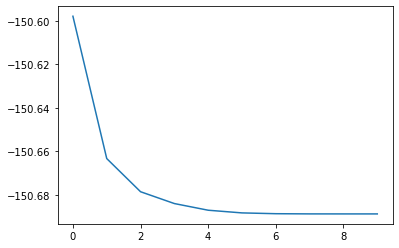

In [13]:
import matplotlib.pyplot as plt
plt.plot(history["energy"])

In [19]:
POCL3 = psi4.geometry("pubchem:24813")

POCL3.geometry().np

def molshow(psi4geo):
    """
    Generates a visualization for psi4.core.Molecule
    """
    geo_view = nv.Psi4Structure(POCL3)
    geo_plot = nv.NGLWidget(geo_view)
    
    return(geo_plot)
molshow(POCL3)

	Searching PubChem database for CID 24813
	Found 1 result(s)


NGLWidget()